# **IMPORT LIBRARY**

In [405]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# **DATA DICTIONARY**

In [406]:
df = pd.read_csv("jabodetabek_house_price.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11360272/#qid~213b5619-a399-47b3-bfcf-faaef6b542d5,2.990000e+09,"Rumah cantik Sumarecon Bekasi\nLingkungan asri, tenang & nyaman","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,hos11360272,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10680347/#qid~748f5d2d-8d3a-4a4e-a1b4-37c7be7ffc25,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,hos10680347,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10685867/#qid~f6c2cf9d-44fa-4c1a-8749-8ee96b116e93,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summarecon Bekasi,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman, Jalur Telepon, Keamanan",rumah,hos10685867,3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10927790/#qid~f6c2cf9d-44fa-4c1a-8749-8ee96b116e93,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNONIA Summarecon Bekasi..,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, Kolam Renang, Kolam Renang, Taman, Taman, CCTV, Jalur Telepon, Keamanan",rumah,hos10927790,3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10785530/#qid~1807f915-9393-4e9c-a6d6-eb3d73117a15,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi, Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Telepon, Keamanan",rumah,hos10785530,4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


# **KUALITAS DATA**

### 1. Kolom Fitur Numerik

In [407]:
numeric_cols =  df.select_dtypes(include=['number']).columns
display(numeric_cols)

Index(['price_in_rp', 'lat', 'long', 'bedrooms', 'bathrooms', 'land_size_m2',
       'building_size_m2', 'carports', 'maid_bedrooms', 'maid_bathrooms',
       'floors', 'building_age', 'year_built', 'garages'],
      dtype='object')

### 2. Kolom Fitur Kategorik

In [408]:
category_cols =  df.select_dtypes(include=['object']).columns
display(category_cols)

Index(['url', 'title', 'address', 'district', 'city', 'facilities',
       'property_type', 'ads_id', 'certificate', 'electricity',
       'property_condition', 'building_orientation', 'furnishing'],
      dtype='object')

### 3. Missing Values

In [409]:
df.isnull().sum()

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

### 4. Data Duplikat

In [410]:
print("banyak data duplikat : ", df.duplicated().sum())

banyak data duplikat :  0


### 5. Outliers

In [411]:
outlier_counts = {}
for col in df[numeric_cols]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many are outside the range
    count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts[col] = count
outlier_counts = pd.DataFrame(data = outlier_counts.items(), columns=['Column', 'Outlier Count'])
display(outlier_counts)

,Column,Outlier Count
0,price_in_rp,385
1,lat,40
2,long,7
3,bedrooms,37
4,bathrooms,197
5,land_size_m2,372
6,building_size_m2,327
7,carports,104
8,maid_bedrooms,44
9,maid_bathrooms,11


# **EDA**

### 1. Heat Map

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

"\nplt.figure(figsize=(12, 10))\ncorrelation_matrix = df[numeric_cols].corr()\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')\nplt.title('Correlation Matrix')\nplt.show()\n"

### 2. Pairplot

In [ ]:
sns.pairplot(df[numeric_cols])
plt.show()

'\nsns.pairplot(df[numeric_cols])\nplt.show()\n'

### 3. Histogram

In [ ]:
plt.figure(figsize=(12, 12)) 
for i,n in enumerate (numeric_cols,1) :
    plt.subplot(4, 4, i)
    sns.histplot(df[n], kde=True)
    plt.title(f"Histogram {n}")
    plt.tight_layout()
plt.show()

'\nplt.figure(figsize=(12, 12)) \nfor i,n in enumerate (numeric_cols,1) :\n    plt.subplot(4, 4, i)\n    sns.histplot(df[n], kde=True)\n    plt.title(f"Histogram {n}")\n    plt.tight_layout()\nplt.show()\n'

### 4. Box Plot

In [ ]:
plt.figure(figsize=(12, 12)) 
for i,n in enumerate (numeric_cols,1) :
    plt.subplot(4, 4, i)
    sns.boxplot(df[n])
    plt.title(f"{n}")
    plt.tight_layout()
plt.show()

'\nplt.figure(figsize=(12, 12)) \nfor i,n in enumerate (numeric_cols,1) :\n    plt.subplot(4, 4, i)\n    sns.boxplot(df[n])\n    plt.title(f"{n}")\n    plt.tight_layout()\nplt.show()\n'

# **DATA PREPROCESSING**

## 1. Pemilihan Fitur (Dropping Kolom Tidak Dibutuhkan)

In [417]:
del_cols = ['url','title','address','property_type','ads_id',
            'certificate', 'year_built',
            'building_orientation'
            ]

for d in del_cols :
    df = df.drop(d,axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price_in_rp         3553 non-null   float64
 1   district            3553 non-null   object 
 2   city                3553 non-null   object 
 3   lat                 3553 non-null   float64
 4   long                3553 non-null   float64
 5   facilities          3553 non-null   object 
 6   bedrooms            3519 non-null   float64
 7   bathrooms           3524 non-null   float64
 8   land_size_m2        3551 non-null   float64
 9   building_size_m2    3551 non-null   float64
 10  carports            3553 non-null   float64
 11  electricity         3553 non-null   object 
 12  maid_bedrooms       3553 non-null   float64
 13  maid_bathrooms      3553 non-null   float64
 14  floors              3547 non-null   float64
 15  building_age        2108 non-null   float64
 16  proper

## 2. Missing Value Handle

### Kolom Kategori

In [419]:
category_cols =  df.select_dtypes(include=['object']).columns
for c in category_cols :
    df[c] = df[c].replace(['nan','Nan','NaN'], np.nan)
    df[c] = df[c].fillna(df[c].mode()[0])

### Kolom Numerik

In [421]:
numeric_cols = df.select_dtypes(include=['number']).columns
for n in numeric_cols :
    df[n] = df[n].replace(['nan','Nan','NaN'], np.nan)
    df[n] = df[n].fillna(df[n].mean())

### Cek Missing Value

In [423]:
df.isnull().sum()

price_in_rp           0
district              0
city                  0
lat                   0
long                  0
facilities            0
bedrooms              0
bathrooms             0
land_size_m2          0
building_size_m2      0
carports              0
electricity           0
maid_bedrooms         0
maid_bathrooms        0
floors                0
building_age          0
property_condition    0
garages               0
furnishing            0
dtype: int64

## 3. Outlier Handling dengan Metode IQR

In [424]:
for n in numeric_cols :
    Q1 = df[n].quantile(0.25)
    Q3 = df[n].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df[n] = np.where(df[n] > upper_bound, upper_bound,np.where(df[n] < lower_bound, lower_bound, df[n]))

In [425]:
outlier_counts = {}
for col in df[numeric_cols]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many are outside the range
    count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts[col] = count
outlier_counts = pd.DataFrame(data = outlier_counts.items(), columns=['Column', 'Outlier Count'])
display(outlier_counts)

,Column,Outlier Count
0,price_in_rp,0
1,lat,0
2,long,0
3,bedrooms,0
4,bathrooms,0
5,land_size_m2,0
6,building_size_m2,0
7,carports,0
8,maid_bedrooms,0
9,maid_bathrooms,0


## 4. Standarisasi Kolom Kategori

a. Kolom Kategori Facilities

In [426]:
standard_map = {
    'Track Lari' : 'Jogging Track',
    'Keamanan 24 jam' :'Keamanan',
    'keamanan 24 jam' : 'Keamanan',
    'security 24 jam' : 'Keamanan',
    'security 24jam' : 'Keamanan',
    'securty 24 jam' : 'Keamanan',
    'Security 24 jam' : 'Keamanan',	
    'Security 24H' : 'Keamanan',
    'Security24 jam' : 'Keamanan', 
    '1 unit AC' : 'AC',	
    '2 unit Ac' : 'AC',	
    'AC 2 unit' : 'AC',
    'AC 3 unit' : 'AC',
    'Ac' : 'AC',
    'toren 500 liter' : 'toren',
    'torrent' : 'toren',
    'Torn 650ltr' : 'toren',
    'Torn Air' : 'toren',
    'CCTV area' : 'CCTV',
    'Carport 1 Mobil' : 'Carport',
    'Carport 1 mobil' : 'Carport',
    'Carport 2 Mobil' : 'Carport',
    'Carport 2 mobi' : 'Carport',
    'Free Kitchen Set' : 'Kitchen Set',	
    'Free kitchen set' : 'Kitchen Set',
    'Full kitchen set' : 'Kitchen Set',
    'kitchen set (opsional)': 'Kitchen Set',
    'Kitchen set' : 'Kitchen Set',
    'One gate sistem' : 'One Gate System',
    'One gate system' : 'One Gate System',
    'one gate sistem' : 'One Gate System',	
    'one gate system' : 'One Gate System',
    'Onegate' : 'One Gate System',	
    'water heater' : 'Water heater',
    'Pemanas Air' : 'Water heater',	
    'Kolam renang anak' : 'Kolam Renang',
    'Pool' : 'Kolam Renang',
    'Private Pool' : 'Kolam Renang',
    'Swimming Pool' : 'Kolam Renang',
    'pompa air wasser dan booster' : 'Jetpump',
    'ketpump' : 'Jetpump',
    'Kompor exhaust' : 'kompor',
    'Taman luas' : 'Taman',
    'Taman minimalis' : 'Taman',
    'Carport 2 mobil' : 'Carport',
    'carport' : 'Carport',	
}

def standardize_facilities(text):
    items = [i.strip() for i in text.split(',')] 
    standardized_items = [standard_map.get(i, i) for i in items]
    return ', '.join(sorted(set(standardized_items))) 

df['facilities'] = df['facilities'].apply(standardize_facilities)


b. Kolom Electricity

In [427]:
def clean_electricity(x):
    if x.isnumeric():
        return int(x)
    else:
        return 3300

df['electricity'] = df['electricity'].str.replace(' mah','').str.strip().apply(clean_electricity)
df.head()


,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Taman, Tempat Jemuran",4.0,4.0,239.0,272.0,0.0,4400,0.0,1.0,2.0,5.00000,bagus,0.0,unfurnished
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,1.0,2200,0.0,0.0,2.0,3.88093,bagus,0.0,unfurnished
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Masjid, Taman",3.0,3.0,119.0,131.0,1.0,2200,1.0,1.0,2.0,3.88093,bagus,1.0,unfurnished
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"CCTV, Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Taman",3.0,3.0,180.0,174.0,0.0,3500,1.0,1.0,2.0,6.00000,bagus sekali,2.0,unfurnished
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Taman",4.0,3.0,328.0,196.0,2.0,3500,1.0,1.0,2.0,9.00000,bagus,1.0,unfurnished


c. Standarisasi Kolom Property Condition

In [ ]:
df['property_condition'] = df['property_condition'].str.lower()

,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
2623,4.750000e+08,Tanjung Priok,Jakarta Utara,-6.127665,106.870664,AC,2.0,1.0,21.0,33.0,0.0,1300,0.0,0.0,2.0,0.00000,baru,0.0,unfurnished
2975,7.000000e+09,BSD City,Tangerang,-6.300733,106.586126,"Jalur Telepon, Jogging Track, Keamanan, Taman",6.0,4.0,335.0,240.0,2.0,3300,0.0,0.0,2.0,2.00000,bagus,0.0,furnished
1598,5.900000e+08,Cinangka,Depok,-6.370387,106.760609,"AC, CCTV, Jalur Telepon, Jogging Track, Keamanan, Masjid, Taman",2.0,1.0,70.0,48.0,1.0,1300,0.0,0.0,1.0,0.00000,baru,0.0,unfurnished
648,9.450000e+08,Sentul City,Bogor,-6.518350,106.851279,"Keamanan, Masjid, One Gate System, Playground, Taman, Tempat Jemuran",3.0,1.0,90.0,70.0,1.0,1300,0.0,0.0,1.0,3.88093,baru,0.0,unfurnished
1344,2.900000e+09,Legenda Wisata,Bogor,-6.403911,106.945203,"AC, Akses Parkir, CCTV, Jalur Telepon, Keamanan, Kitchen Set, Kolam Renang, Masjid, One Gate System, Playground, Taman, Tempat Jemuran, Tempat Laundry, Wastafel",4.0,4.0,180.0,180.0,2.0,3300,1.0,1.0,2.0,3.88093,bagus,0.0,furnished


## 5. Labelling Kolom Kategori

A. Labelling Kolom City

In [429]:
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'].astype(str))
df.head()

,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
0,2.990000e+09,Summarecon Bekasi,0,-6.223945,106.986275,"Jalur Telepon, Taman, Tempat Jemuran",4.0,4.0,239.0,272.0,0.0,4400,0.0,1.0,2.0,5.00000,bagus,0.0,unfurnished
1,1.270000e+09,Summarecon Bekasi,0,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,1.0,2200,0.0,0.0,2.0,3.88093,bagus,0.0,unfurnished
2,1.950000e+09,Summarecon Bekasi,0,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Masjid, Taman",3.0,3.0,119.0,131.0,1.0,2200,1.0,1.0,2.0,3.88093,bagus,1.0,unfurnished
3,3.300000e+09,Summarecon Bekasi,0,-6.223945,106.986275,"CCTV, Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Taman",3.0,3.0,180.0,174.0,0.0,3500,1.0,1.0,2.0,6.00000,bagus sekali,2.0,unfurnished
4,4.500000e+09,Summarecon Bekasi,0,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Taman",4.0,3.0,328.0,196.0,2.0,3500,1.0,1.0,2.0,9.00000,bagus,1.0,unfurnished


B. Labelling Kolom District

In [430]:
df['district'] = label_encoder.fit_transform(df['district'].astype(str))
df.head()

,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
0,2.990000e+09,343,0,-6.223945,106.986275,"Jalur Telepon, Taman, Tempat Jemuran",4.0,4.0,239.0,272.0,0.0,4400,0.0,1.0,2.0,5.00000,bagus,0.0,unfurnished
1,1.270000e+09,343,0,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,1.0,2200,0.0,0.0,2.0,3.88093,bagus,0.0,unfurnished
2,1.950000e+09,343,0,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Masjid, Taman",3.0,3.0,119.0,131.0,1.0,2200,1.0,1.0,2.0,3.88093,bagus,1.0,unfurnished
3,3.300000e+09,343,0,-6.223945,106.986275,"CCTV, Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Taman",3.0,3.0,180.0,174.0,0.0,3500,1.0,1.0,2.0,6.00000,bagus sekali,2.0,unfurnished
4,4.500000e+09,343,0,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Taman",4.0,3.0,328.0,196.0,2.0,3500,1.0,1.0,2.0,9.00000,bagus,1.0,unfurnished


D. Labelling Kolom Property Condition dan Furnishing

In [431]:
# nilai yang benar untuk furnishing
valid_furnishing = ['unfurnished', 'semi furnished', 'furnished', 'fully furnished']

# auto-normalisasi isi kolom
df['furnishing'] = df['furnishing'].str.lower()

# 1. perbaiki anomaly "baru" atau kondisi lain yang salah masuk furnishing
mask_condition_in_furnishing = df['furnishing'].isin(['baru', 'bagus', 'bagus sekali', 'butuh renovasi', 'sudah renovasi'])

df.loc[mask_condition_in_furnishing, 'property_condition'] = df.loc[mask_condition_in_furnishing, 'furnishing']
df.loc[mask_condition_in_furnishing, 'furnishing'] = None

# 2. Mapping yang sudah benar
condition_map = {
    'butuh renovasi': 0,
    'sudah renovasi': 1,
    'bagus': 2,
    'bagus sekali': 3,
    'baru': 4
}

furnishing_map = {
    'unfurnished': 0,
    'semi furnished': 1,
    'furnished': 2,
    'fully furnished': 2
}

df['property_condition_mapped'] = df['property_condition'].map(condition_map)
df['furnishing_status'] = df['furnishing'].map(furnishing_map)

# isi missing dengan modus setelah dirapikan
df['property_condition_mapped'] = df['property_condition_mapped'].fillna(df['property_condition_mapped'].mode()[0])
df['furnishing_status'] = df['furnishing_status'].fillna(df['furnishing_status'].mode()[0])
df = df.drop(['property_condition', 'furnishing'], axis=1)


In [432]:
pd.set_option('display.max_columns', None)

# tampilkan semua baris
pd.set_option('display.max_rows', None)

# tampilkan semua karakter per kolom (tidak dipotong)
pd.set_option('display.max_colwidth', None)
df.head()

,price_in_rp,district,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,garages,property_condition_mapped,furnishing_status
0,2.990000e+09,343,0,-6.223945,106.986275,"Jalur Telepon, Taman, Tempat Jemuran",4.0,4.0,239.0,272.0,0.0,4400,0.0,1.0,2.0,5.00000,0.0,2,0.0
1,1.270000e+09,343,0,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,1.0,2200,0.0,0.0,2.0,3.88093,0.0,2,0.0
2,1.950000e+09,343,0,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Masjid, Taman",3.0,3.0,119.0,131.0,1.0,2200,1.0,1.0,2.0,3.88093,1.0,2,0.0
3,3.300000e+09,343,0,-6.223945,106.986275,"CCTV, Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Taman",3.0,3.0,180.0,174.0,0.0,3500,1.0,1.0,2.0,6.00000,2.0,3,0.0
4,4.500000e+09,343,0,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Keamanan, Kolam Renang, Taman",4.0,3.0,328.0,196.0,2.0,3500,1.0,1.0,2.0,9.00000,1.0,2,0.0


E. Labelling Kolom Facilities

In [433]:
df['facilities'] = df['facilities'].apply(lambda x: [i.strip() for i in x.split(',')])
df['facilities'] = df['facilities'].apply(lambda x: sorted(set(x)))  # hapus duplikasi & urutkan

mlb = MultiLabelBinarizer()
facilities_encoded = mlb.fit_transform(df['facilities'])

df = pd.concat([df, pd.DataFrame(facilities_encoded, columns=mlb.classes_, index=df.index)], axis=1)
df = df.drop(['facilities',''],axis=1)

df.head()


,price_in_rp,district,city,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,garages,property_condition_mapped,furnishing_status,AC,Akses Parkir,Backyard luas,Balkon,Basement,CCTV,Canopy,Carport,Dapur bersih dan kotor,Garasi,Garden,Gudang,Jalur Telepon,Jetpump,Jogging Track,Keamanan,Kitchen Set,Kolam Ikan,Kolam Renang,Kulkas,Lapangan Basket,Lapangan Bola,Lapangan Bulu Tangkis,Lapangan Tenis,Lapangan Voli,Lemari kayu,Living room,Masjid,Mesin Cuci,Mushola,Musholla Exclusive,One Gate System,Pagar,Playground,Servis Area,Smart Home,Taman,Tempat Gym,Tempat Jemuran,Tempat Laundry,Void,Wastafel,Water heater,clubhouse,jetpump,kompor,posisi hoek,service area,smart lock door,smarthome,toren
0,2.990000e+09,343,0,-6.223945,106.986275,4.0,4.0,239.0,272.0,0.0,4400,0.0,1.0,2.0,5.00000,0.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.270000e+09,343,0,-6.223945,106.986275,3.0,2.0,55.0,69.0,1.0,2200,0.0,0.0,2.0,3.88093,0.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.950000e+09,343,0,-6.223945,106.986275,3.0,3.0,119.0,131.0,1.0,2200,1.0,1.0,2.0,3.88093,1.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.300000e+09,343,0,-6.223945,106.986275,3.0,3.0,180.0,174.0,0.0,3500,1.0,1.0,2.0,6.00000,2.0,3,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.500000e+09,343,0,-6.223945,106.986275,4.0,3.0,328.0,196.0,2.0,3500,1.0,1.0,2.0,9.00000,1.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 6. Standarisasi Kolom Numerik

In [434]:
scaler = StandardScaler()
cols_standard = df.drop('price_in_rp',axis=1).columns
df_scaled = df.copy()
df_scaled[cols_standard] = scaler.fit_transform(df[cols_standard])
df.head()

,price_in_rp,district,city,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,garages,property_condition_mapped,furnishing_status,AC,Akses Parkir,Backyard luas,Balkon,Basement,CCTV,Canopy,Carport,Dapur bersih dan kotor,Garasi,Garden,Gudang,Jalur Telepon,Jetpump,Jogging Track,Keamanan,Kitchen Set,Kolam Ikan,Kolam Renang,Kulkas,Lapangan Basket,Lapangan Bola,Lapangan Bulu Tangkis,Lapangan Tenis,Lapangan Voli,Lemari kayu,Living room,Masjid,Mesin Cuci,Mushola,Musholla Exclusive,One Gate System,Pagar,Playground,Servis Area,Smart Home,Taman,Tempat Gym,Tempat Jemuran,Tempat Laundry,Void,Wastafel,Water heater,clubhouse,jetpump,kompor,posisi hoek,service area,smart lock door,smarthome,toren
0,2.990000e+09,343,0,-6.223945,106.986275,4.0,4.0,239.0,272.0,0.0,4400,0.0,1.0,2.0,5.00000,0.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.270000e+09,343,0,-6.223945,106.986275,3.0,2.0,55.0,69.0,1.0,2200,0.0,0.0,2.0,3.88093,0.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.950000e+09,343,0,-6.223945,106.986275,3.0,3.0,119.0,131.0,1.0,2200,1.0,1.0,2.0,3.88093,1.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.300000e+09,343,0,-6.223945,106.986275,3.0,3.0,180.0,174.0,0.0,3500,1.0,1.0,2.0,6.00000,2.0,3,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.500000e+09,343,0,-6.223945,106.986275,4.0,3.0,328.0,196.0,2.0,3500,1.0,1.0,2.0,9.00000,1.0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Model Training**

## 1. Fitur Split

In [435]:
x_scaled = df_scaled.drop('price_in_rp',axis = 1)
x = df.drop('price_in_rp',axis = 1)
y = df['price_in_rp']

## 2. Data Split

In [436]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## 3. Import Model

a. Linier Regression

In [437]:
model_lr = LinearRegression()
model_lr.fit(x_train_scaled,y_train_scaled)

LinearRegression()

b. Random Forest Regression

In [438]:
model_rr = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt'
)
model_rr.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5)

## 4. Evaluasi Model

In [439]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    print(f'MSE      : {mse : .2f}')
    print(f'RMSE     : {rmse : .2f}')
    print(f'R2 Score : {r2 : .2f}')

In [440]:
print("Evaluasi Model Linier Regression")
evaluate_model(model_lr,x_test_scaled,y_test_scaled)
print("Evaluasi Model Random Forest Regression")
evaluate_model(model_rr,x_test,y_test)

Evaluasi Model Linier Regression
MSE      :  705038943596572800.00
RMSE     :  839665971.44
R2 Score :  0.88
Evaluasi Model Random Forest Regression
MSE      :  478424449136425280.00
RMSE     :  691682332.53
R2 Score :  0.92


## 5. Koefisien Fitur Model Linier Regression

C:\Users\asust\AppData\Local\Temp\ipykernel_18768\2019725915.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Coefficient', data=coef_df, palette='coolwarm')


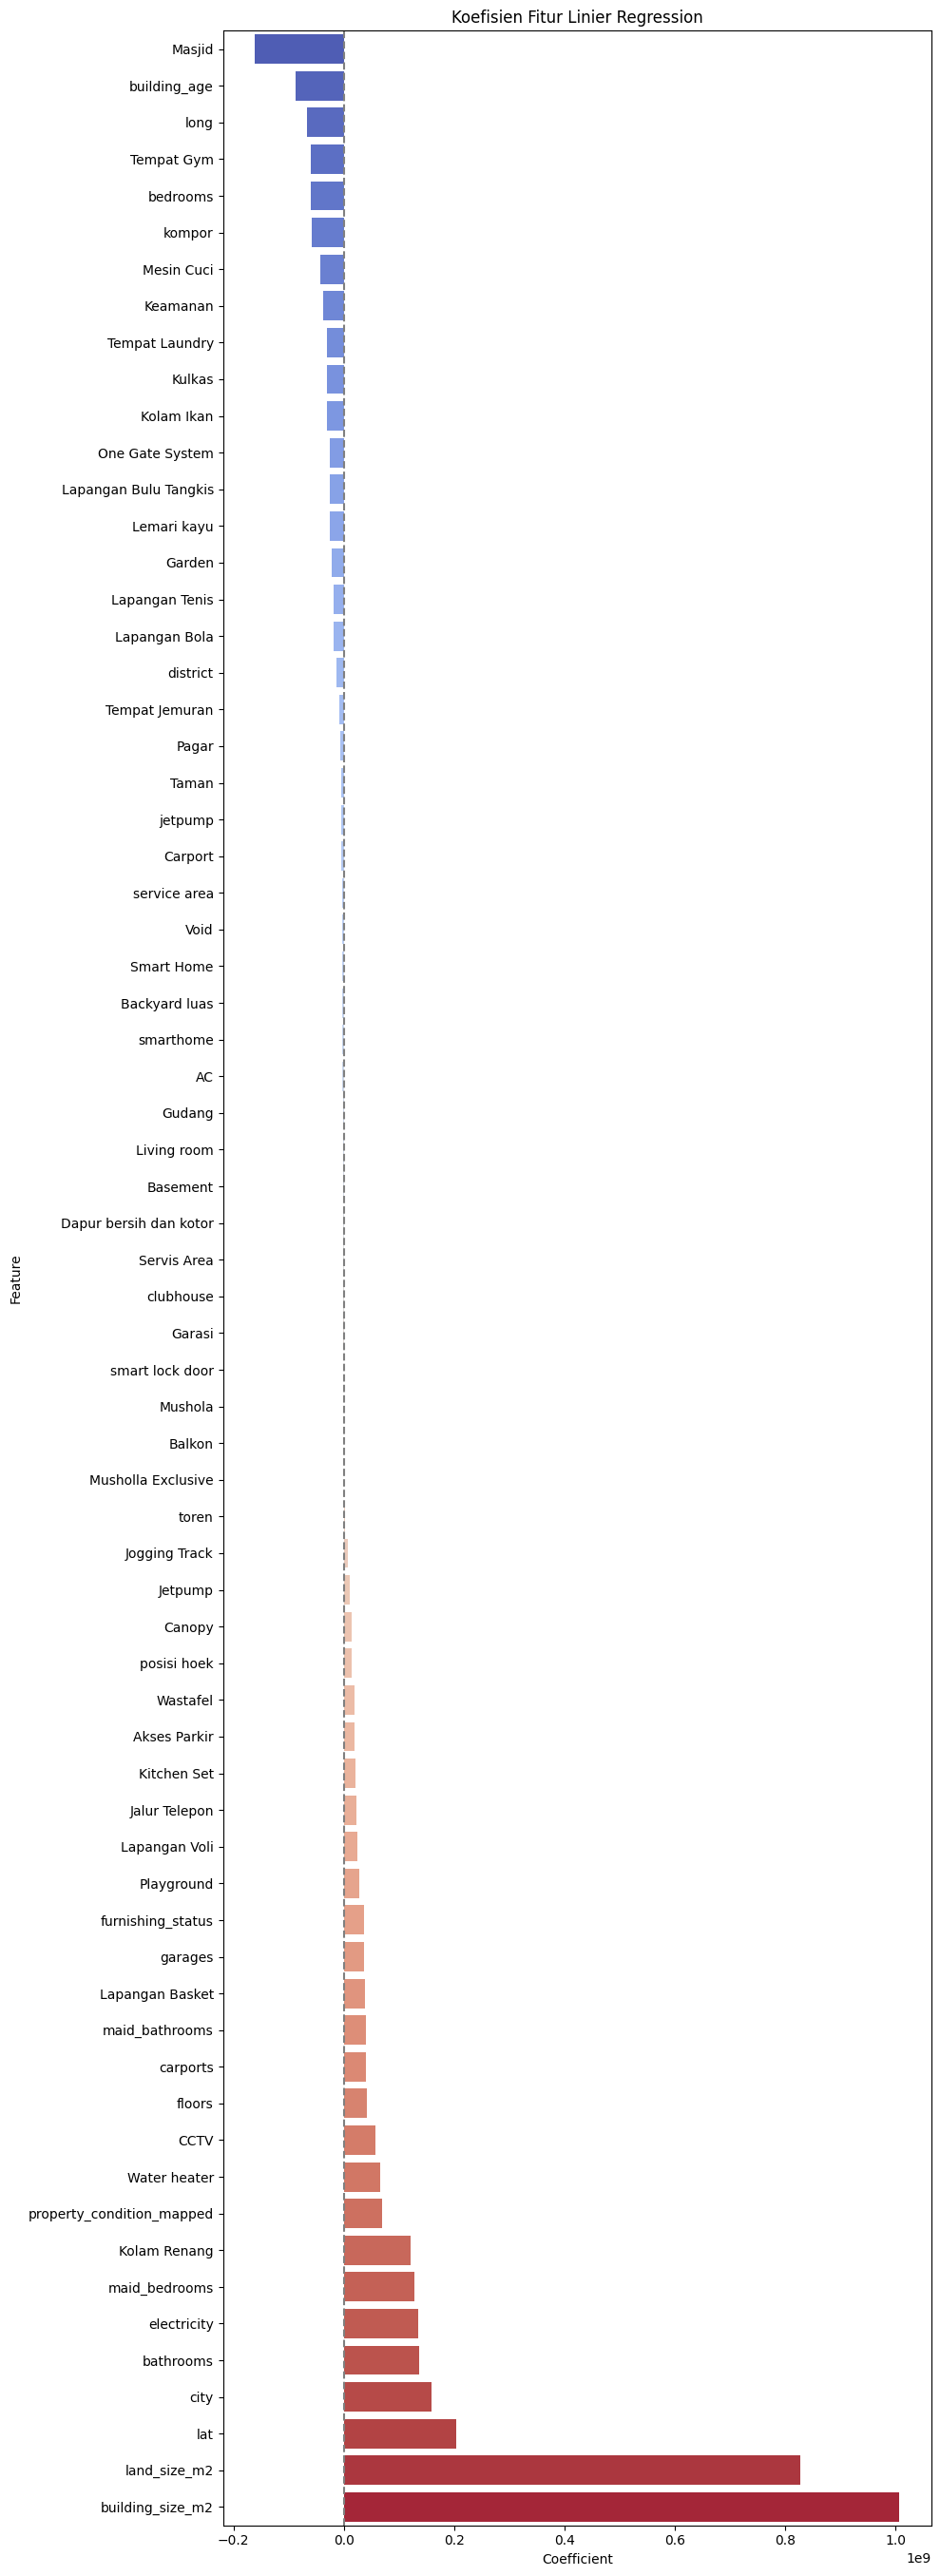

In [441]:
coefficients = model_lr.coef_
features = x.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, len(coef_df) * 0.4))
sns.barplot(y='Feature', x='Coefficient', data=coef_df, palette='coolwarm')
plt.title(f'Koefisien Fitur Linier Regression')
plt.axvline(x=0, color='grey', linestyle='--')
plt.tight_layout()
plt.show()
    


C:\Users\asust\AppData\Local\Temp\ipykernel_18768\1093137742.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


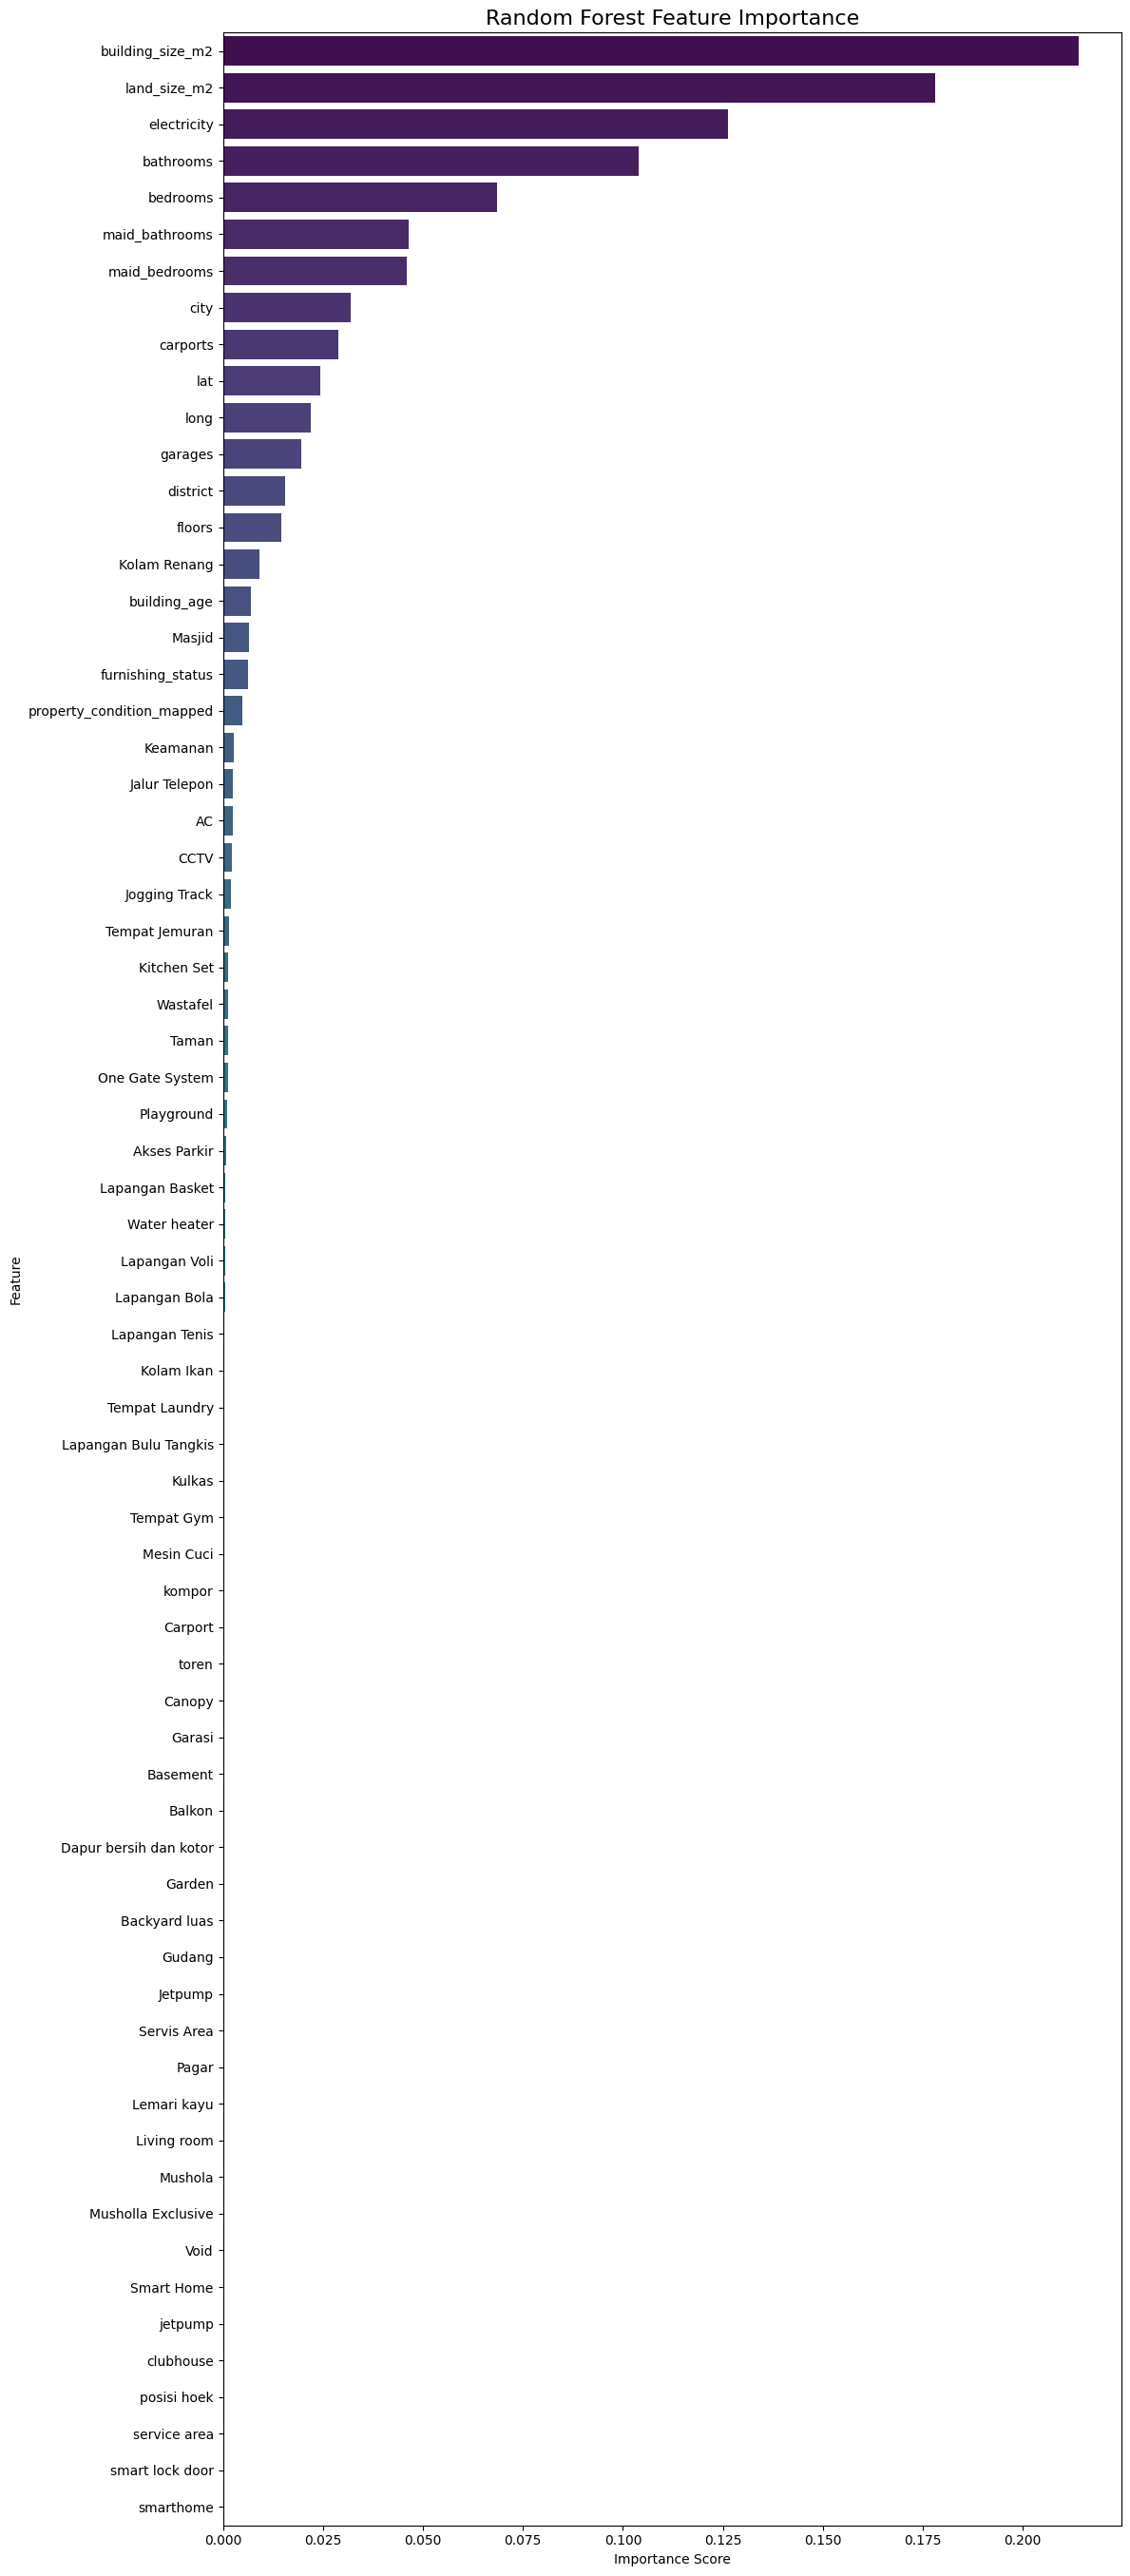

In [442]:
importances = model_rr.feature_importances_

fi_df2 = pd.DataFrame({
    'Feature': x.columns,
    'Skor': importances
}).sort_values(by='Skor', ascending=False)

plt.figure(figsize=(12, max(6, len(fi_df2)*0.4)))
sns.barplot(
    data=fi_df2,
    x='Skor',
    y='Feature',
    palette='viridis'
)
plt.title("Random Forest Feature Importance", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 6. Asli vs Prediksi 

In [443]:
def compare(model, x_test) :
    y_pred = model.predict(x_test)
    df_compare = pd.DataFrame({
        'Actual' : y_test,
        'Predicted' : y_pred,

    }).reset_index(drop=True)
    plt.figure(figsize=(50,10))
    sns.lineplot(data=df_compare)
    plt.title('Nilai Asli vs Nilai Predikat ')
    plt.ylabel('Harga Rumah *Rp 100.000.000')
    plt.show()


a. Asli vs Prediksi Linier Regression

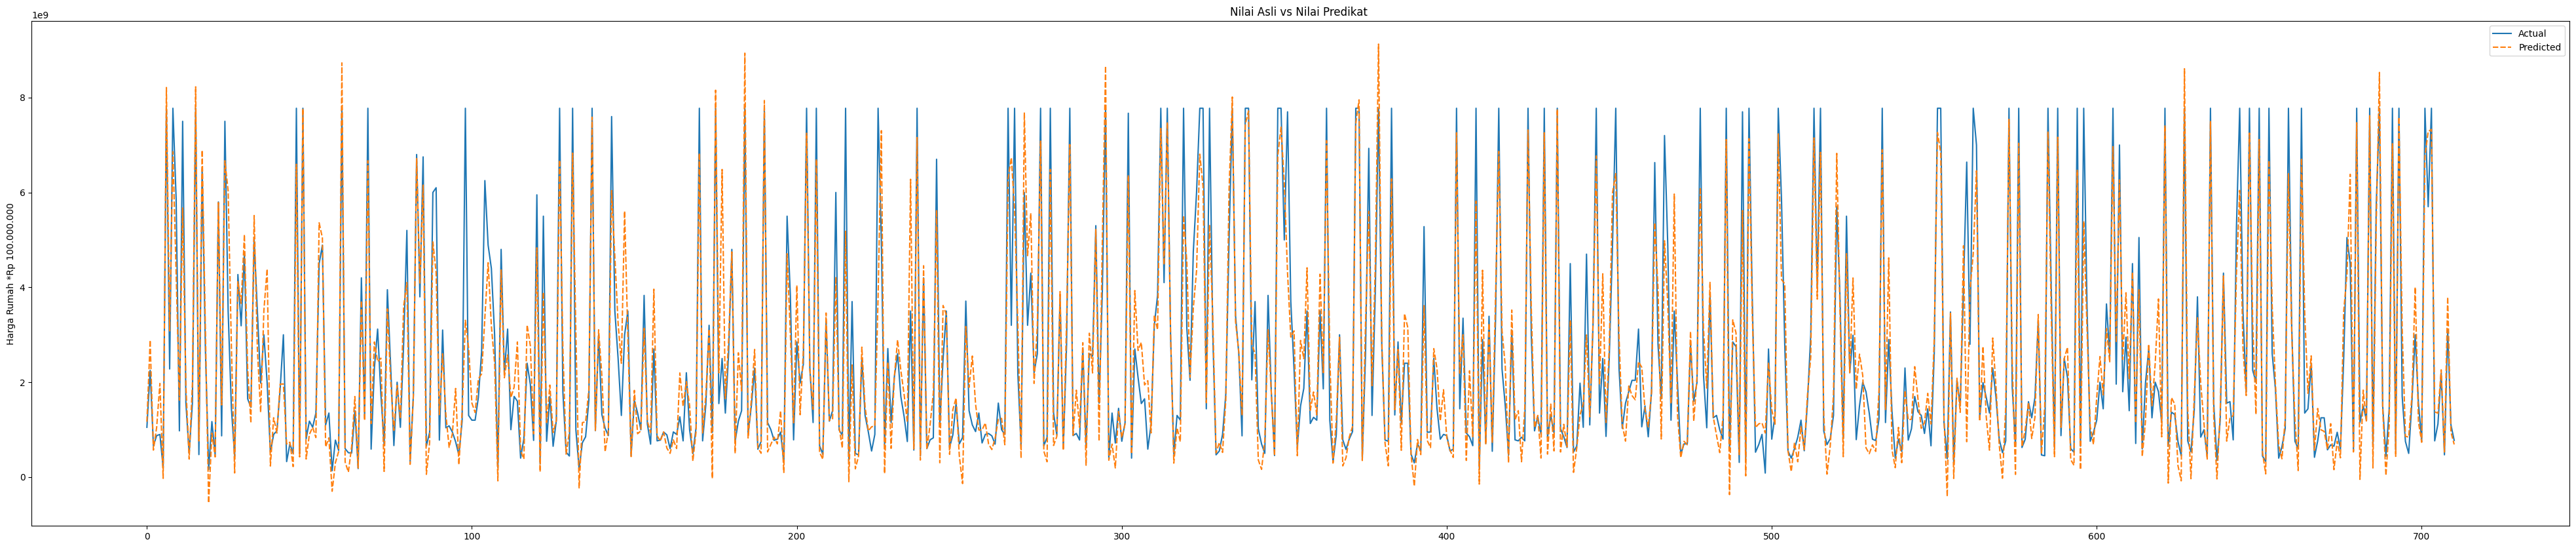

In [444]:
compare( model_lr, x_test_scaled)

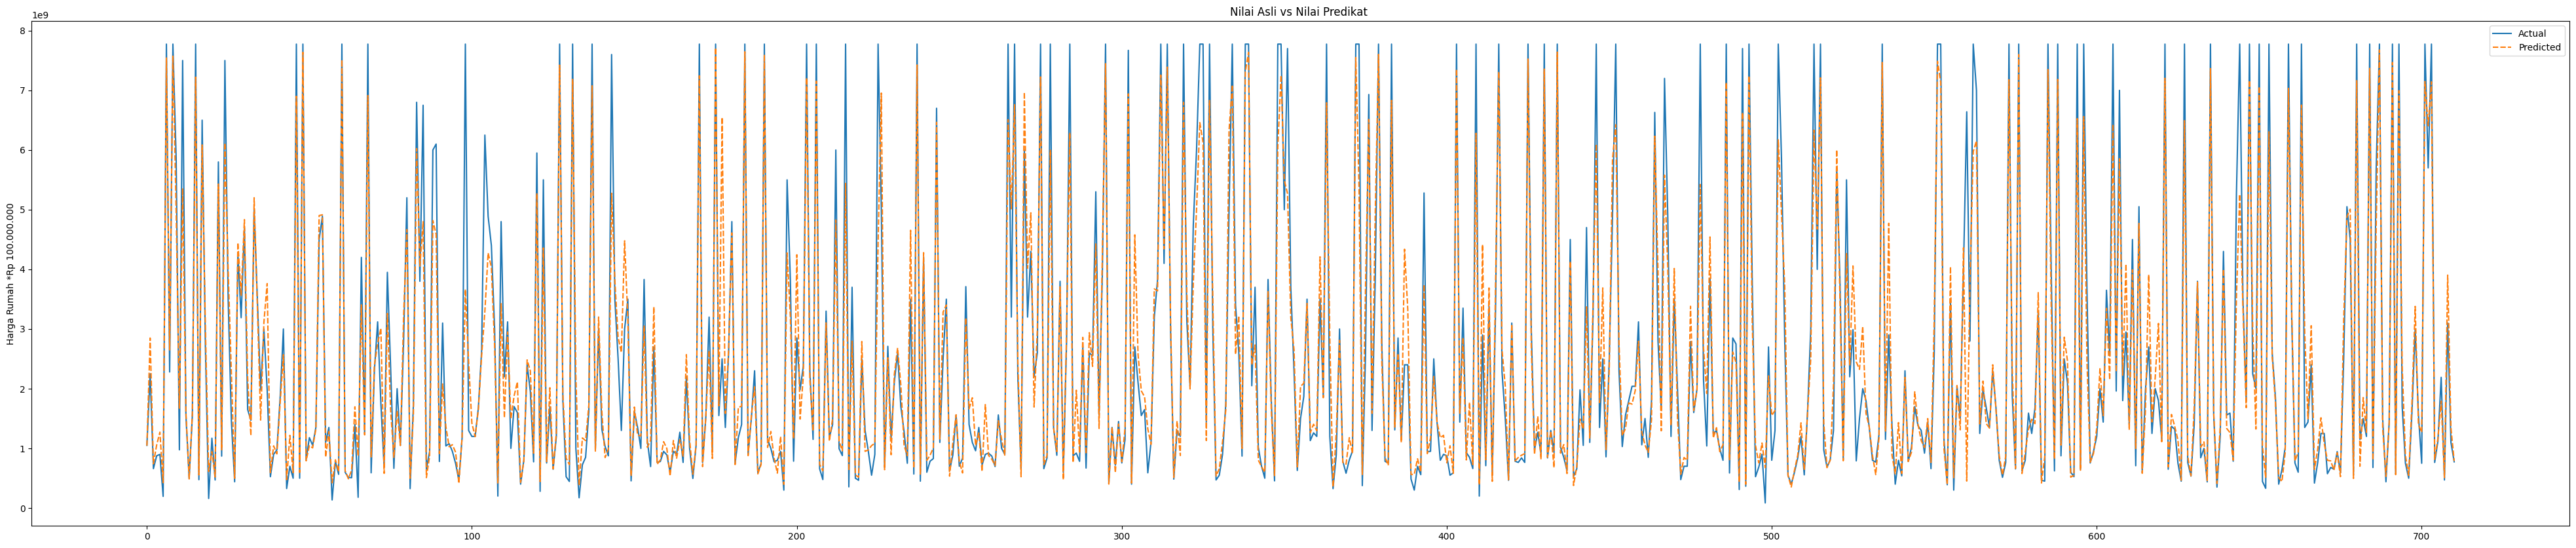

In [445]:
compare( model_rr, x_test)

End of code